# Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import datetime


import yfinance as yf

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.preprocessing import MinMaxScaler

# Choosing the dates

In [6]:
TRAIN_START_DATE = '2000-01-01'
TRAIN_END_DATE = '2022-12-31'
TEST_START_DATE = '2023-01-01'
TEST_END_DATE = '2025-04-01'

# Choosing the symbols

In [7]:
symbols = {
    'MSFT',
    'NVDA',
    'META',
    'AAPL'
}

# Load the train data

In [8]:
train_data = {}

for symbol in symbols:
    train_data[symbol] = yf.download(
                            symbol, 
                            start=TRAIN_START_DATE, 
                            end=TRAIN_END_DATE, 
                            interval="1d"
                        )

print(train_data["MSFT"])

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2000-01-03   35.792301   36.425623   34.391316   36.041792  53228400
2000-01-04   34.583244   35.965039   34.468095   34.871118  54119000
2000-01-05   34.947891   35.734747   33.585288   34.122653  64059600
2000-01-06   33.777191   34.967069   33.278210   34.448897  54976600
2000-01-07   34.218594   34.468084   32.951949   33.354972  62013600
...                ...         ...         ...         ...       ...
2022-12-23  234.405411  234.542874  229.702188  231.832877  21207000
2022-12-27  232.667496  234.601796  231.557961  234.375966  16688600
2022-12-28  230.281509  235.377495  229.928030  232.598759  17457100
2022-12-29  236.644135  237.537654  231.381230  231.381230  19770700
2022-12-30  235.475693  235.613156  232.372932  233.894857  21938500

[5787 rows x 5 columns]


# Check the columns

In [9]:
print(train_data['NVDA'].columns)

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])


# Load the test data

In [10]:
test_data = {}

for symbol in symbols:
    test_data[symbol] = yf.download(
                            symbol, 
                            start=TEST_START_DATE, 
                            end=TEST_END_DATE, 
                            interval="1d"
                        )
print(test_data["MSFT"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2023-01-03  235.240036  241.298265  233.099519  238.676634  25740000
2023-01-04  224.949875  228.651571  221.866756  228.072262  50623400
2023-01-05  218.282883  223.427966  217.742843  223.084300  39585600
2023-01-06  220.855392  221.670359  215.376487  218.960362  43613600
2023-01-09  223.005737  227.051114  222.308607  222.347876  27369800
...                ...         ...         ...         ...       ...
2025-03-25  395.160004  396.359985  392.640015  393.920013  15775000
2025-03-26  389.970001  395.309998  388.570007  395.000000  16108400
2025-03-27  390.579987  392.239990  387.399994  390.130005  13766800
2025-03-28  378.799988  389.130005  376.929993  388.079987  21632000
2025-03-31  375.390015  377.070007  367.239990  372.540009  35184700

[562 rows x 5 columns]


# Merge the train and test data and preprocess them

In [11]:
train_close_list = []
for symbol in symbols:
    tmp = train_data[symbol]['Close']
    train_close_list.append(tmp)

train_merged = pd.concat(train_close_list, axis=1)
train_merged.dropna(inplace=True)

print("Train merged shape:", train_merged.shape)
print(train_merged.head())

Train merged shape: (2673, 4)
Ticker          NVDA       MSFT       AAPL       META
Date                                                 
2012-05-18  0.276934  23.350185  15.961042  38.050671
2012-05-21  0.281748  23.733107  16.890938  33.870369
2012-05-22  0.278310  23.741077  16.761232  30.854582
2012-05-23  0.285187  23.222549  17.170198  31.849894
2012-05-24  0.277622  23.190634  17.012518  32.875061


In [12]:
test_close_list = []
for symbol in symbols:
    tmp = test_data[symbol]['Close']
    test_close_list.append(tmp)

test_merged = pd.concat(test_close_list, axis=1)
test_merged.dropna(inplace=True)

print("Test merged shape:", test_merged.shape)
print(test_merged.head())

Test merged shape: (562, 4)
Ticker           NVDA        MSFT        AAPL        META
Date                                                     
2023-01-03  14.303278  235.240036  123.632523  124.154854
2023-01-04  14.736924  224.949875  124.907700  126.772514
2023-01-05  14.253322  218.282883  123.583099  126.344536
2023-01-06  14.846834  220.855392  128.130234  129.410080
2023-01-09  15.615205  223.005737  128.654129  128.862656


# Scale the data

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))


train_values = train_merged.values
test_values = test_merged.values


scaler.fit(train_values)


train_scaled = scaler.transform(train_values)
test_scaled = scaler.transform(test_values)

print("Scaled train shape:", train_scaled.shape)
print("Scaled test shape:", test_scaled.shape)

Scaled train shape: (2673, 4)
Scaled test shape: (562, 4)


# Predict price after 10 days

In [14]:
def create_sequences_multisymbol(dataset, lookback=10):
    """
    dataset: NumPy array of shape (num_days, 4) for 4 symbols
    lookback: number of timesteps to use as input
    
    Returns X, y:
      X.shape = (num_samples, lookback, 4)
      y.shape = (num_samples, 4)
    """
    X, y = [], []
    for i in range(len(dataset) - lookback):
        seq_X = dataset[i : i + lookback]
        seq_y = dataset[i + lookback]
        X.append(seq_X)
        y.append(seq_y)
    return np.array(X), np.array(y)

lookback_window = 10
X_train_all, y_train_all = create_sequences_multisymbol(train_scaled, lookback_window)
X_test_all, y_test_all = create_sequences_multisymbol(test_scaled, lookback_window)

print("X_train_all shape:", X_train_all.shape)
print("y_train_all shape:", y_train_all.shape) 

print("X_test_all shape:", X_test_all.shape)
print("y_test_all shape:", y_test_all.shape)


X_train_all shape: (2663, 10, 4)
y_train_all shape: (2663, 4)
X_test_all shape: (552, 10, 4)
y_test_all shape: (552, 4)


In [15]:
model2 = keras.Sequential([
    layers.Input(shape=(lookback_window, 4)),
    # First LSTM layer returns the entire sequence for the next LSTM
    layers.LSTM(64, return_sequences=True),
    # Second LSTM layer returns the final output
    layers.LSTM(64, return_sequences=False),
    # Dense layer for your final output (4 symbols)
    layers.Dense(4)
])

model2.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 50,948
Trainable params: 50,948
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model2.fit(
    X_train_all,
    y_train_all,
    epochs=20,
    batch_size=32,
    validation_split=0.1,   # 10% of training data used for validation
    verbose=1
)

Epoch 1/20
75/75 [==============================] - 3s 13ms/step - loss: 0.0120 - val_loss: 0.0179
Epoch 2/20
75/75 [==============================] - 0s 5ms/step - loss: 8.0285e-04 - val_loss: 0.0064
Epoch 3/20
75/75 [==============================] - 0s 5ms/step - loss: 5.0011e-04 - val_loss: 0.0031
Epoch 4/20
75/75 [==============================] - 0s 5ms/step - loss: 3.4200e-04 - val_loss: 0.0026
Epoch 5/20
75/75 [==============================] - 0s 5ms/step - loss: 2.6002e-04 - val_loss: 0.0022
Epoch 6/20
75/75 [==============================] - 0s 5ms/step - loss: 2.4721e-04 - val_loss: 0.0022
Epoch 7/20
75/75 [==============================] - 0s 6ms/step - loss: 2.2937e-04 - val_loss: 0.0030
Epoch 8/20
75/75 [==============================] - 0s 5ms/step - loss: 2.4686e-04 - val_loss: 0.0020
Epoch 9/20
75/75 [==============================] - 0s 5ms/step - loss: 2.1385e-04 - val_loss: 0.0023
Epoch 10/20
75/75 [==============================] - 0s 5ms/step - loss: 2.4714e-04 -

In [17]:
pred_scaled = model2.predict(X_test_all)       # shape = (num_samples, 4)
y_test_pred = scaler.inverse_transform(pred_scaled)
y_test_true = scaler.inverse_transform(y_test_all)

print("Predicted shape:", y_test_pred.shape)
print("Actual shape:", y_test_true.shape)

# Print the first few predictions vs actual
for i in range(10):
    print(f"Day {i}: ")
    print("  Predicted:", y_test_pred[i])
    print("  Actual:   ", y_test_true[i])

18/18 [==============================] - 0s 2ms/step
Predicted shape: (552, 4)
Actual shape: (552, 4)
Day 0: 
  Predicted: [ 16.538982 223.86893  128.8369   137.96684 ]
  Actual:    [ 17.36277771 231.53831482 133.6559906  132.39601135]
Day 1: 
  Predicted: [ 16.878239 224.1958   130.0896   138.8638  ]
  Actual:    [ 16.75127411 227.72859192 133.71528625 135.51132202]
Day 2: 
  Predicted: [ 17.123066 225.05896  131.01788  139.38565 ]
  Actual:    [ 17.82439423 235.86842346 136.28540039 138.7162323 ]
Day 3: 
  Predicted: [ 17.449913 226.57104  132.07724  140.01695 ]
  Actual:    [ 19.17728806 238.1856842  139.4881897  142.59793091]
Day 4: 
  Predicted: [ 17.850056 228.24574  133.17776  141.22075 ]
  Actual:    [ 19.24922752 237.65545654 140.89186096 142.46853638]
Day 5: 
  Predicted: [ 18.229603 229.80962  134.44385  142.66864 ]
  Actual:    [ 19.3071804  236.25137329 140.22955322 140.83624268]
Day 6: 
  Predicted: [ 18.594183 231.14209  135.67548  143.66074 ]
  Actual:    [ 19.78578568 

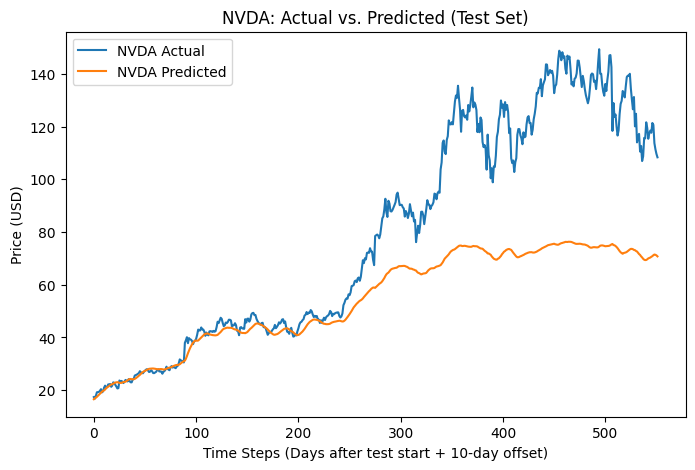

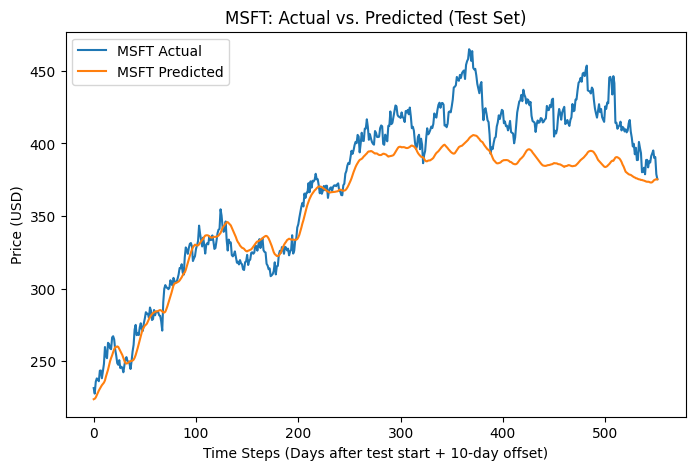

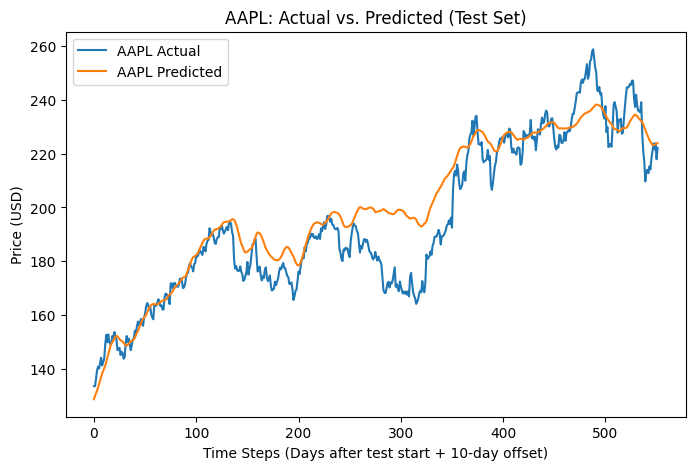

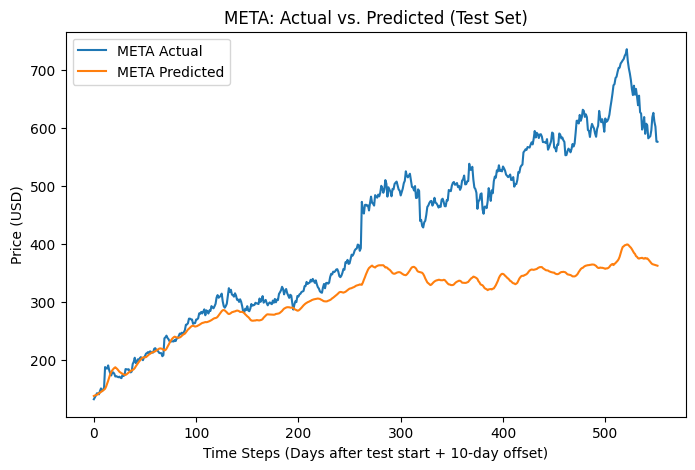

In [18]:

for i, symbol in enumerate(symbols):
    # Extract actual vs. predicted for this symbol (i)
    actual = y_test_true[:, i]
    predicted = y_test_pred[:, i]

    plt.figure(figsize=(8, 5))
    plt.plot(actual, label=f"{symbol} Actual")
    plt.plot(predicted, label=f"{symbol} Predicted")
    plt.legend()
    plt.title(f"{symbol}: Actual vs. Predicted (Test Set)")
    plt.xlabel("Time Steps (Days after test start + 10-day offset)")
    plt.ylabel("Price (USD)")
    plt.show()


In [19]:

def to_percentage_changes(price_array):
    """
    Convert an (N, 4) array of prices into (N-1, 4) array of daily % changes.
    """
    # Numerator: price_array[1:] - price_array[:-1]
    # Denominator: price_array[:-1]
    pct_changes = (price_array[1:] - price_array[:-1]) / price_array[:-1] * 100
    return pct_changes

# Transform actuals and predictions into % changes
y_test_true_pct = to_percentage_changes(y_test_true)
y_test_pred_pct = to_percentage_changes(y_test_pred)

# Now build a DataFrame for easier comparison
symbols_list = sorted(symbols)  # Make sure to have a consistent symbol order
comparison_df = pd.DataFrame()

for i, sym in enumerate(symbols_list):
    comparison_df[f'{sym}_Actual_%']    = y_test_true_pct[:, i]
    comparison_df[f'{sym}_Predicted_%'] = y_test_pred_pct[:, i]

# Inspect the first few rows
print(comparison_df.head(10))

   AAPL_Actual_%  AAPL_Predicted_%  META_Actual_%  META_Predicted_%  \
0      -3.521923          2.051253      -1.645396          0.146011   
1       6.406200          1.450550       3.574356          0.385002   
2       7.590125          1.908812       0.982438          0.671862   
3       0.375128          2.293092      -0.222611          0.739149   
4       0.301066          2.126308      -0.590806          0.685171   
5       2.478898          1.999935       3.071355          0.579816   
6       2.843162          2.199174       0.064517          0.515258   
7      -5.907193          2.160262      -2.196163          0.512880   
8       1.956998          1.442349       2.101273          0.374229   
9       7.196597          1.054185       1.993455          0.384890   

   MSFT_Actual_%  MSFT_Predicted_%  NVDA_Actual_%  NVDA_Predicted_%  
0       0.044364          0.972315       2.353025          0.650125  
1       1.922080          0.713573       2.365050          0.375800  
2       

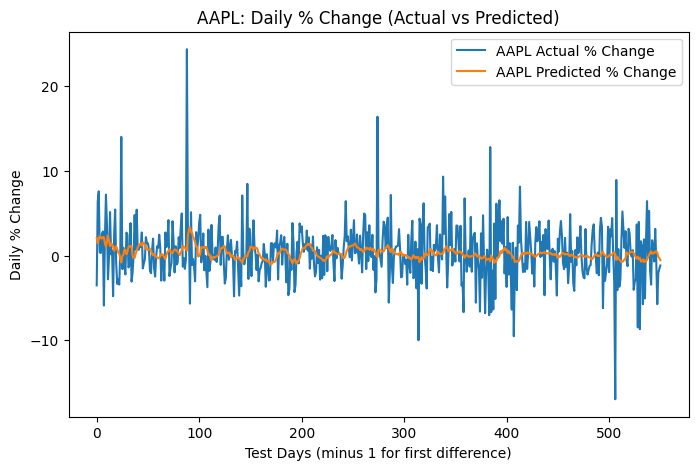

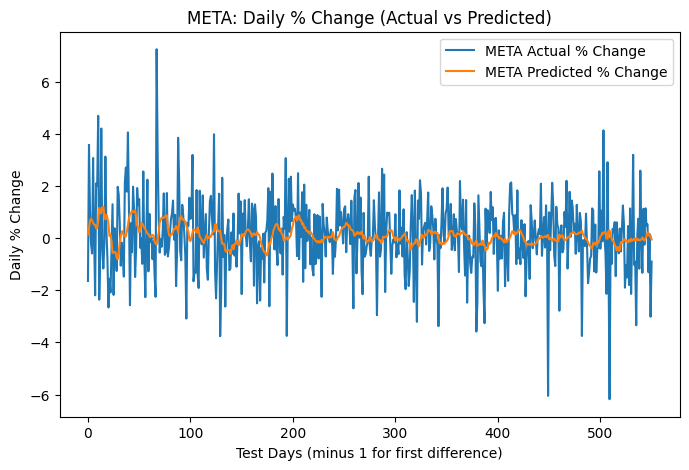

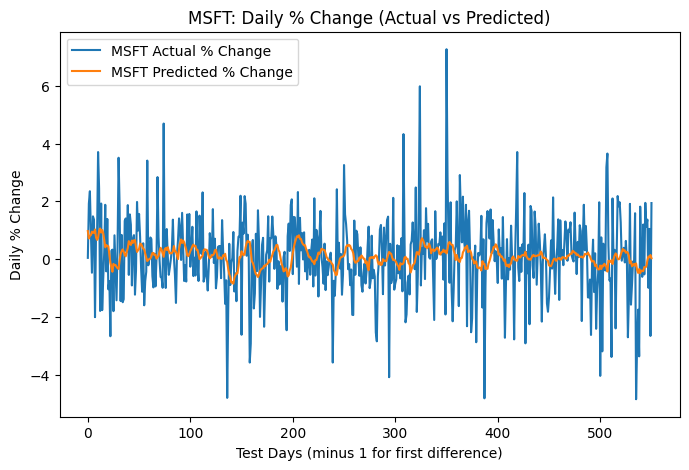

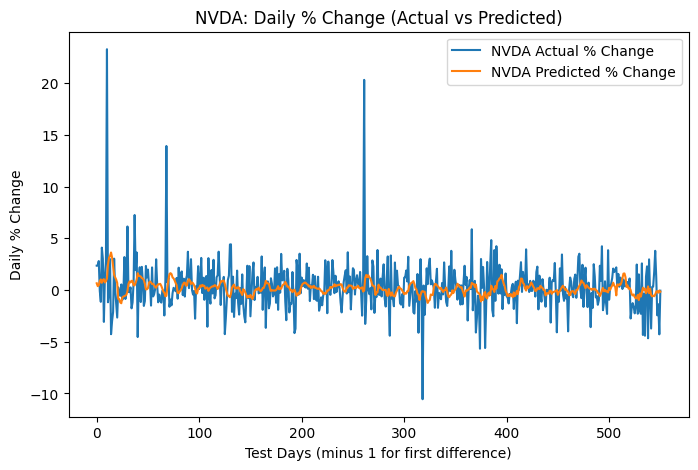

In [20]:
import matplotlib.pyplot as plt

for i, sym in enumerate(symbols_list):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test_true_pct[:, i], label=f"{sym} Actual % Change")
    plt.plot(y_test_pred_pct[:, i], label=f"{sym} Predicted % Change")
    plt.title(f"{sym}: Daily % Change (Actual vs Predicted)")
    plt.xlabel("Test Days (minus 1 for first difference)")
    plt.ylabel("Daily % Change")
    plt.legend()
    plt.show()

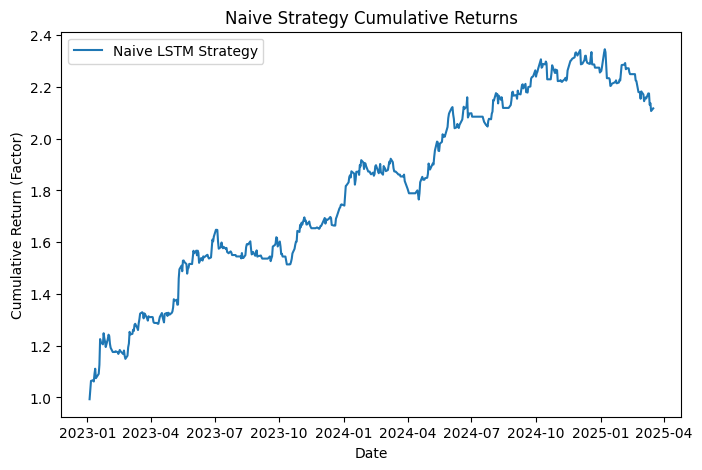

Final return over period: 111.74%


In [21]:

# (1) Predicted vs. Actual percentage changes
predicted_changes = y_test_pred_pct  # Shape (N-1, 4)
actual_changes = y_test_true_pct     # Shape (N-1, 4)

# (2) Build signals (+1 = long, -1 = short)
signals = np.zeros_like(predicted_changes)
signals[predicted_changes > 0.005] = 1


# (3) Compute daily returns based on actual price changes
daily_symbol_returns = signals * actual_changes  # Shape (N-1, 4)

# (4) Aggregate into portfolio return (average across symbols)
daily_portfolio_return = daily_symbol_returns.mean(axis=1)  # Shape (N-1,)

# (5) Ensure dates match the number of rows in y_test_true_pct
dates_for_test = test_merged.index  # Get actual test dataset dates
dates_for_test = dates_for_test[1:len(daily_portfolio_return) + 1]  # Align length exactly

# (6) Create strategy returns with properly aligned dates
strategy_returns = pd.Series(daily_portfolio_return, index=dates_for_test)

# (7) Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod()

# (8) Plot cumulative returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="Naive LSTM Strategy")
plt.title("Naive Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Factor)")
plt.legend()
plt.show()

# (9) Evaluate final total return
final_return = cumulative_returns.iloc[-1] - 1
print(f"Final return over period: {final_return * 100:.2f}%")

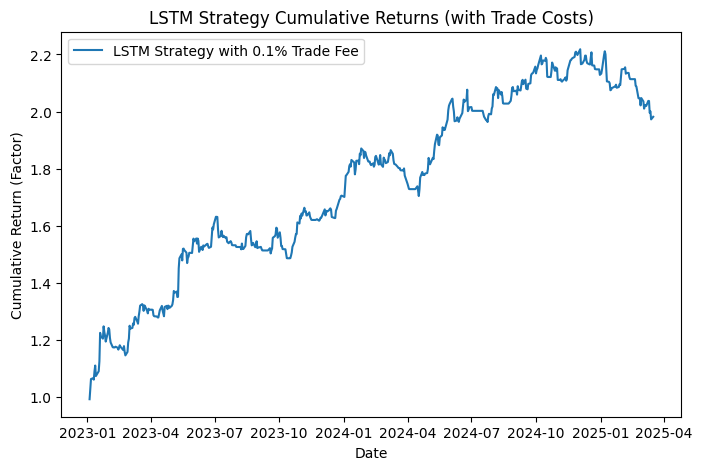

Final return over period (after fees): 98.18%


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (1) Predicted vs. Actual percentage changes
predicted_changes = y_test_pred_pct  # Shape (N-1, 4)
actual_changes = y_test_true_pct     # Shape (N-1, 4)

# (2) Build signals (+1 = long, -1 = short)
signals = np.zeros_like(predicted_changes)
signals[predicted_changes > 0.005] = 1


# (3) Compute daily returns based on actual price changes
daily_symbol_returns = signals * actual_changes  # Shape (N-1, 4)

# (4) Calculate **trade cost mask** (detect when a trade occurs)
# A trade occurs when today's position != yesterday's position
trade_mask = (signals[1:] != signals[:-1])  # Shape (N-2, 4)
trade_costs = trade_mask * 0.1  # 0.1% per trade

# (5) Apply transaction costs: 
# Deduct trade cost when we enter or exit a trade
daily_symbol_returns[1:] -= trade_costs  # First row has no cost (since no prior trade)

# (6) Aggregate into portfolio return (average across symbols)
daily_portfolio_return = daily_symbol_returns.mean(axis=1)  # Shape (N-1,)

# (7) Ensure dates match the number of rows in y_test_true_pct
dates_for_test = test_merged.index  # Get actual test dataset dates
dates_for_test = dates_for_test[1:len(daily_portfolio_return) + 1]  # Align length exactly

# (8) Create strategy returns with properly aligned dates
strategy_returns = pd.Series(daily_portfolio_return, index=dates_for_test)

# (9) Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod()

# (10) Plot cumulative returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns, label="LSTM Strategy with 0.1% Trade Fee")
plt.title("LSTM Strategy Cumulative Returns (with Trade Costs)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Factor)")
plt.legend()
plt.show()

# (11) Evaluate final total return
final_return = cumulative_returns.iloc[-1] - 1
print(f"Final return over period (after fees): {final_return * 100:.2f}%")

In [23]:

long_mask = (signals == 1)  # shape: (N-1, 4)

# Step 3: Check if actual changes were indeed positive on those days
# If actual_changes > 0, then it was a "correct long"
correct_when_long = long_mask & (actual_changes > 0)  # shape: (N-1, 4)

# Step 4: Compute accuracy only on days/symbols with a long signal
long_mask_flat = long_mask.ravel()
correct_when_long_flat = correct_when_long.ravel()

long_accuracy = correct_when_long_flat.sum() / long_mask_flat.sum()
print(f"Long-Only Accuracy: {long_accuracy * 100:.2f}%")


Long-Only Accuracy: 54.99%


In [24]:
# (A) Create masks for long vs. short
long_mask = (signals == 1)     # True/False array for when we went long
short_mask = (signals == -1)   # True/False array for when we went short

# (B) For each day/symbol, check if we were correct:
#     - Correct long if actual price change > 0
#     - Correct short if actual price change < 0
correct_when_long = long_mask & (actual_changes > 0)
correct_when_short = short_mask & (actual_changes < 0)

# (C) Flatten or sum them up directly. Example using sum:
num_correct_long = correct_when_long.sum()  
num_longs = long_mask.sum()
num_correct_short = correct_when_short.sum()
num_shorts = short_mask.sum()

# (D) Calculate accuracies
long_accuracy = num_correct_long / num_longs if num_longs > 0 else float('nan')
short_accuracy = num_correct_short / num_shorts if num_shorts > 0 else float('nan')

print(f"Long-Only Accuracy:  {long_accuracy*100:.2f}%  (on {num_longs} long signals)")


Long-Only Accuracy:  54.99%  (on 1362 long signals)


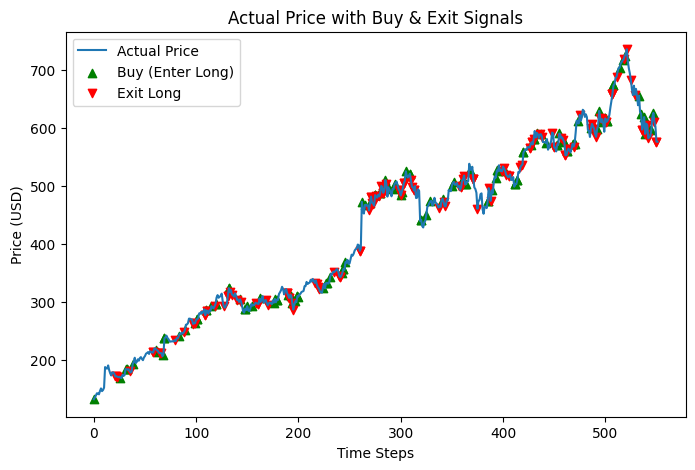

In [25]:
import numpy as np
import matplotlib.pyplot as plt


# 1) Identify BUY points: times when we *enter* a long
buy_indices = np.where(
    (signals[1:] == 1) & (signals[:-1] != 1)
)[0] + 1

# 2) Identify EXIT points: times when we *stop* being long
exit_indices = np.where(
    (signals[:-1] == 1) & (signals[1:] != 1)
)[0] + 1

# 3) Force a Buy at t=0 if we start in a long
if signals[0].any() == 1:
    buy_indices = np.concatenate(([0], buy_indices))

# 4) Force an Exit at t=T-1 if we end in a long
if signals[-1].any() == 1:
    exit_indices = np.concatenate((exit_indices, [len(signals) - 1]))

# 5) Plot only the actual price
plt.figure(figsize=(8, 5))
plt.plot(actual, label="Actual Price")

# 6) Overlay Buy signals as green upward triangles
plt.scatter(
    buy_indices, 
    actual[buy_indices], 
    marker="^", 
    color="green", 
    label="Buy (Enter Long)"
)

# 7) Overlay Exit signals as red downward triangles
plt.scatter(
    exit_indices, 
    actual[exit_indices], 
    marker="v", 
    color="red", 
    label="Exit Long"
)

# 8) Final labeling
plt.title("Actual Price with Buy & Exit Signals")
plt.xlabel("Time Steps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

